In [37]:
import numpy as np
import seaborn as sns
from matplotlib import colormaps

In [27]:
def f(x):
    return x

def A_loc(f, points, eta, t):
    output = 0
    normalization = 0
    d = np.abs(points[1] - points[0])

    output += (f(points[0]) * np.exp((
            (1 - t) + 
            t * (1 - ((d ** 2) / 2))) / eta
        ))

    output += (f(points[1]) * np.exp(
        (t + 
        (1 - t) * (1 - ((d ** 2) / 2))) / eta
        ))

    normalization += np.exp((
            (1 - t) + 
            t * (1 - ((d ** 2) / 2))) / eta)
    normalization += np.exp(
        (t + 
        (1 - t) * (1 - ((d ** 2) / 2))) / eta
        )


    return output / normalization

<Axes: >

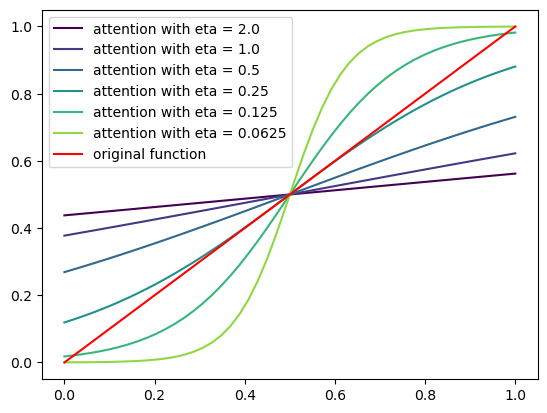

In [42]:
points = [0, 1.]
cmap = colormaps.get_cmap('viridis')

t_s = np.linspace(0, 1)

etas = np.power(2., np.arange(1, -5, -1))
colors = np.arange(len(etas)) / len(etas)

for eta, color in zip(etas, colors):
    A_loc_f_p_eta = np.vectorize(lambda t : A_loc(f, points, eta, t))

    outputs = A_loc_f_p_eta(t_s)

    sns.lineplot(x = t_s, y = outputs, label = f"attention with eta = {eta}",
                 color = cmap(color))

sns.lineplot(x = t_s, y = f(t_s), label = f"original function", color='red')

In [35]:
etas

array([2.    , 1.    , 0.5   , 0.25  , 0.125 , 0.0625])